# Setup

In [152]:
# importing
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [153]:
# loading the data
df = pd.read_csv('churn_bank.csv')

NRows, NColumns = df.shape

columnNames = list(df.columns)

In [154]:
# Creating two additional datasets for comparison
dfStayed = df.loc[df['Exited']==1]
dfExited = df.loc[df['Exited']==0]

# General Analysis

### Calculating the differences in summary statistics

In [155]:
#pip install tabulate
from tabulate import tabulate

In [156]:
## calculating the differences in summary statistics
columnNamesDescribe = list(df.columns.drop(['Surname', 'Geography', 'Gender']))
columns2keep = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
columns2Drop = [val for val in columnNamesDescribe if val not in columns2keep]

differences_in_trends = np.array(dfExited.describe().T.drop(columns2Drop)) - np.array(dfStayed.describe().T.drop(columns2Drop))
#differences_in_trends = (np.array(dfExited.describe().T.drop(columns2Drop)) - np.array(dfStayed.describe().T.drop(columns2Drop)))/np.array(dfStayed.describe().T.drop(columns2Drop))
#len(columnNames)-len(differences_in_trends)
differences_in_trends = pd.DataFrame(differences_in_trends).set_index(pd.Index(columns2keep))

headers=['variable', 'count','mean', 'std', 'min', '25%', '50%', '75%', 'max']
table = [pd.DataFrame(columns2keep), pd.DataFrame(differences_in_trends)]
print(tabulate(differences_in_trends, headers))

variable           count           mean           std    min        25%       50%       75%        max
---------------  -------  -------------  ------------  -----  ---------  --------  --------  ---------
CreditScore         5926       6.5017      -4.66767    55          7          7        2          0
Age                 5926      -7.42961      0.363801    0         -7         -9      -10          8
Tenure              5926       0.100535    -0.0554485   0          1          0       -1          0
Balance             5926  -18363.2       4487.25        0     -38340     -17276.6  -5023.05  -29365.3
EstimatedSalary     5926   -1727.29      -506.831      78.49   -1124.23   -2815.8  -3812.95     184.38


* Credit Score: no big difference between exited and stayed, except that it seems the min value of those who exited is higher.
* Age: those who exit are on average 7 years younger.
* tenure: Those who exit seem to have been clients of the bank for a bit longer, but not a significative amount of time in average.
* Balance: Those who exit seem to have a smaller average balance (of almost 19000).
* EstmatedSalary: those who exit have a slightly smaller salary but nothing huge/significative.

### Making dictionaries for the general descriptions

In [157]:
# creating a dictionary for all types
types_df = df.dtypes.to_frame(name="type")

types = {}
for i in range(0, 13):
    types[columnNames[i]] = types_df.iloc[i, 0].type

In [158]:
# creating a dictionary for all mins, means, maxs, ...
df_describe = df.describe().T

mins_df = df_describe.loc[:,"min"]
maxs_df = df_describe.loc[:,"max"]
means_df = df_describe.loc[:,"mean"]
median_df = df_describe.loc[:,"50%"]
std_df = df_describe.loc[:,"std"]

mins = {}
means = {}
maxs = {}
medians = {}
stds = {}

for i in range(len(df_describe)):
    key = columnNamesDescribe[i]
    mins[key] = mins_df.iloc[i]
    maxs[key] = maxs_df.iloc[i]
    means[key] = means_df.iloc[i]
    medians[key] = median_df.iloc[i]
    stds[key] = std_df.iloc[i]
    

# Individual distribution of variables

The categorical variables are be Geography, Gender, HasCrCard, IsActiveMember, Exited.

The quantitative variables are CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary. 

We will not be focusing on CustomerId or Surname. 

### Customer Profile: Gender, Age and Geography

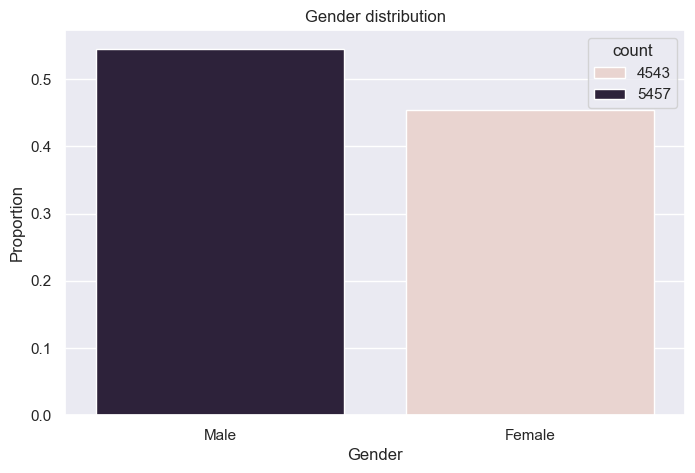

The bank has 4543 female clients (45.43 percent of the total) and 5457 male clients (54.57 percent of the total).


In [159]:
# gender
fig, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = df["Gender"].value_counts().index,
            y = df["Gender"].value_counts(normalize=True), 
            hue=df["Gender"].value_counts()#,
            #palette=sns.color_palette("colorblind")
)
sns.set_theme(style="darkgrid")
ax.set(
    title = "Gender distribution",
    xlabel = "Gender",
    ylabel = "Proportion"
)
plt.show()

message = "The bank has {} female clients ({} percent of the total) and {} male clients ({} percent of the total).".format(
    df["Gender"].value_counts().iloc[1],
    df["Gender"].value_counts(normalize=True).mul(100).round(2).iloc[1],
    df["Gender"].value_counts().iloc[0],
    df["Gender"].value_counts(normalize=True).mul(100).round(2).iloc[0]
)
print(message)

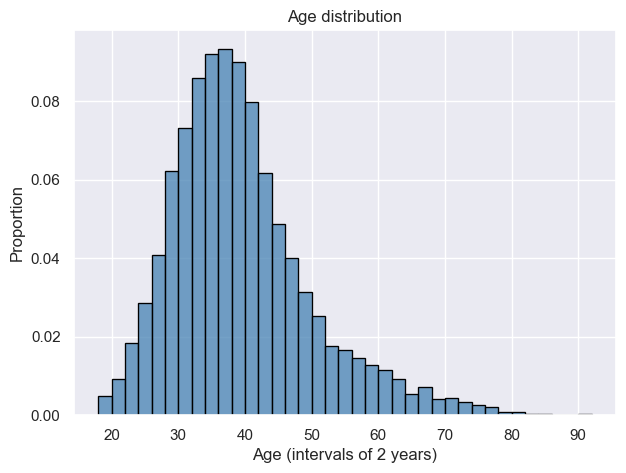

The bank's clients are between 18 and 92 years old, with the median age being 37.0 and a standard deviation of 10.49 years.


In [160]:
# Age
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["Age"],
    stat='probability',
    binwidth = 2,
    color="steelblue",
    edgecolor = "black",
)

ax.set(
    title = "Age distribution",
    xlabel = "Age (intervals of 2 years)",
    ylabel = "Proportion"
)
sns.set_theme(style="darkgrid")
plt.show()

message = "The bank's clients are between {} and {} years old, with the median age being {} and a standard deviation of {} years.".format(
    int(mins["Age"]), int(maxs["Age"]),
    round(medians["Age"], 2), round(stds["Age"], 2)
)
print(message)

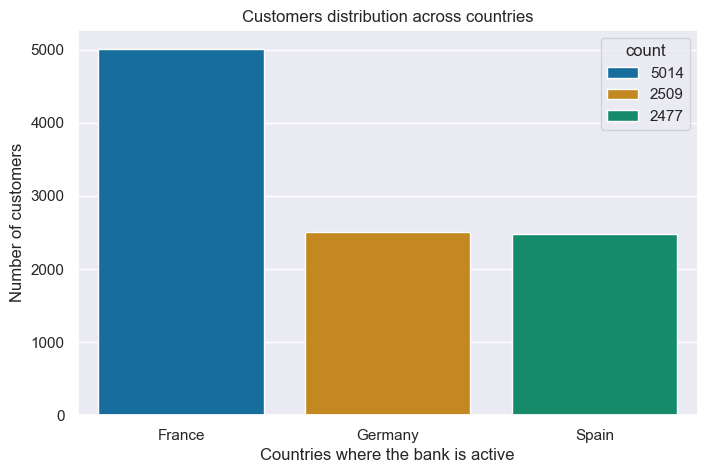

The bank's clients are majoritarily from France (50.14 percent),
followed closely by Germany and Spain (25.09 and 24.77 percent of the total respectively).


In [161]:
# Geography
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["Geography"].value_counts().index,
            y = df["Geography"].value_counts(),
            hue=df["Geography"].value_counts(),
            hue_order = df["Geography"].value_counts(),
            palette=sns.color_palette("colorblind", 3)
            )

sns.set_theme(style="darkgrid")

ax.set(
    title = "Customers distribution across countries",
    xlabel = "Countries where the bank is active",
    ylabel = "Number of customers"
)
plt.show()

message = "The bank's clients are majoritarily from France ({} percent),\nfollowed closely by Germany and Spain ({} and {} percent of the total respectively).".format(
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[0],
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[1],
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[2]
)
print(message)

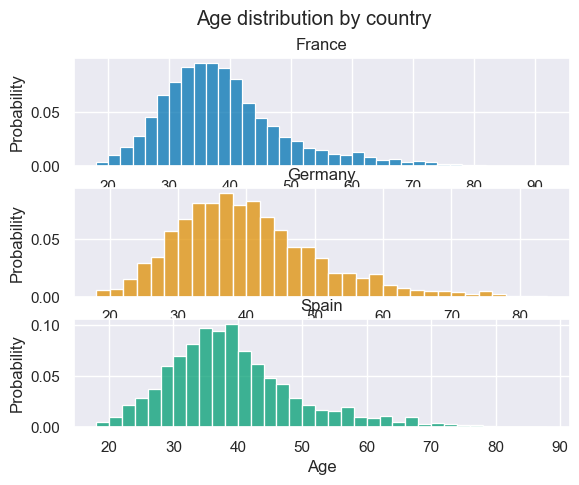

In [162]:
# Age and geography
fig, ax = plt.subplots(3, 1)

for i in range (0,3):
    country = df["Geography"].value_counts().index[i]
    ax[i].set_title(country)

    this_df = df[df["Geography"] == country]

    sns.histplot(
        x = this_df["Age"],
        stat='probability',
        color=sns.color_palette("colorblind")[i],
        binwidth = 2,
        ax=ax[i]
    )

#ax.set(
#    ylabel = "proportion"
#)
sns.set_theme(style="darkgrid")
fig.suptitle('Age distribution by country')
plt.show()

There doesnt seem to be any major differences in age distribution for the three countries. 

### Customer Description: Financial Analysis

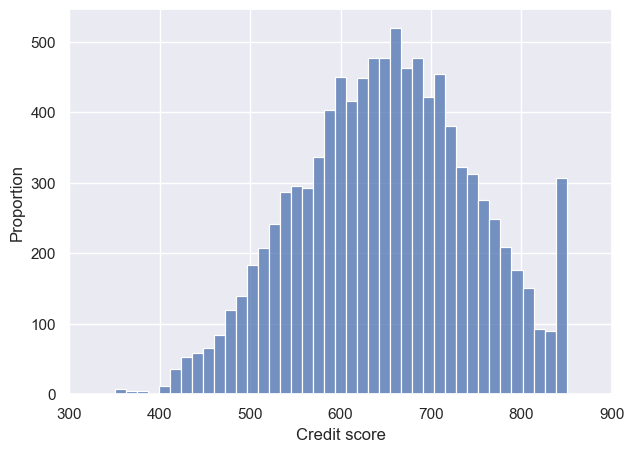

The average credit score is around 650.5288, with a standard deviation of 96.65 points.
However, this doesn't let us see in detail what the credit score means.


In [163]:
# Credit Score
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["CreditScore"]
)
plt.xlim([300, 900]) 

ax.set(
    xlabel = "Credit score",
    ylabel = "Proportion"
)
plt.show()

message = "The average credit score is around {}, with a standard deviation of {} points.\nHowever, this doesn't let us see in detail what the credit score means.".format(
    means["CreditScore"],
    round(stds["CreditScore"], 2)
)
print(message)

Credit scores have categories to simplify the condition of the client:

![image.png](https://www.simmonsbank.com/siteassets/content-hub/learning-center/credit-score-image.jpg)

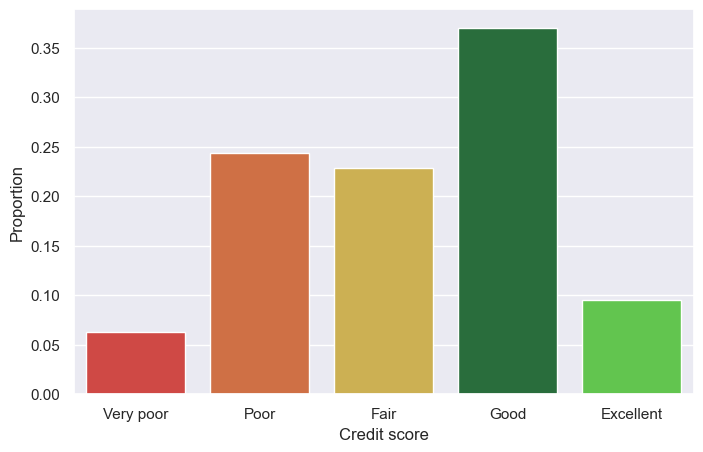

Most clients' credit scores between 'poor' and 'fair',
with 'good' being the most common and very few scoring 'excellent' or 'very poor' credit.


In [164]:
# Categorical Credit Score
conditions = [
    (df['CreditScore'] <= 499),
    ((df['CreditScore'] > 499) & (df['CreditScore'] <= 600)),
    ((df['CreditScore'] > 600) & (df['CreditScore'] <= 660)),
    ((df['CreditScore'] > 660) & (df['CreditScore'] <= 780)),
    (df['CreditScore'] > 780)
    ]
values = ['Very poor', 'Poor', 'Fair', 'Good', 'Excellent']

colors_CreditScore = ["#e6332e", "#e6682e", "#e0bb3f", "#1e7837", "#55d93b"]

df["CreditScoreCategory"] = np.select(conditions, values, default=df["CreditScore"])
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["CreditScoreCategory"].value_counts().index,
            y = df["CreditScoreCategory"].value_counts(normalize=True),
            order=values,
            hue = df["CreditScoreCategory"].value_counts().index,
            hue_order = values,
            palette=sns.color_palette(colors_CreditScore)
            )

ax.set(
    xlabel = "Credit score",
    ylabel = "Proportion"
)
plt.show()

message = "Most clients' credit scores between 'poor' and 'fair',\nwith 'good' being the most common and very few scoring 'excellent' or 'very poor' credit."
print(message)

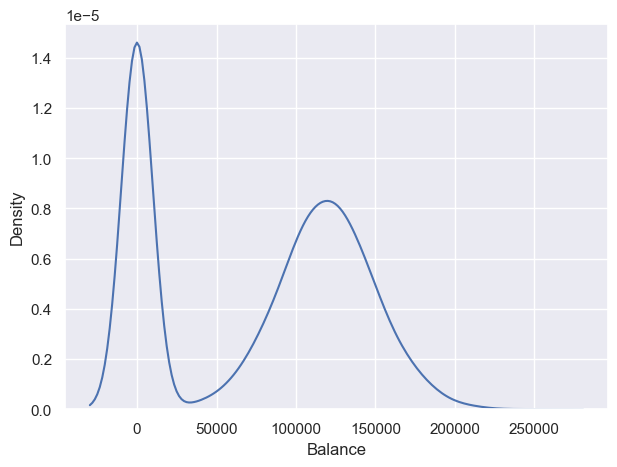

The average balance is of 76485.89€ and the median is of 97198.54€.
This is because the proportion of people whose balance is at 0 is considerable: 36.17 percent.


In [165]:
# Balance
fig, ax = plt.subplots(figsize=[7, 5])

sns.kdeplot(
    x = df["Balance"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
)
plt.show()


message = "The average balance is of {}€ and the median is of {}€.\nThis is because the proportion of people whose balance is at 0 is considerable: {} percent.".format(
    round(means["Balance"],2),
    round(medians["Balance"],2),
    round((len(df.query("Balance == 0"))/NRows)*100,2)
)
print(message)

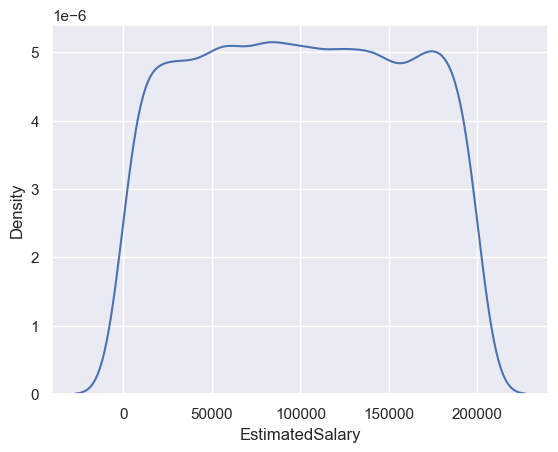

The average estimated salary is of 100090.24€ and the median is of 100193.92€.
Indeed, we observe a very uniform distribution across all values, with a slight peak at the end of the distribution.


In [166]:
# Estimated Salary
# Add legend!!!

sns.kdeplot(
    x = df["EstimatedSalary"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True)
)

ax.set(
    xlabel = "Estimated Salary"
)
plt.show()

message = "The average estimated salary is of {}€ and the median is of {}€.\nIndeed, we observe a very uniform distribution across all values, with a slight peak at the end of the distribution.".format(
    round(means["EstimatedSalary"],2),
    round(medians["EstimatedSalary"],2)
)

print(message)

### Customer Analysis: Activity

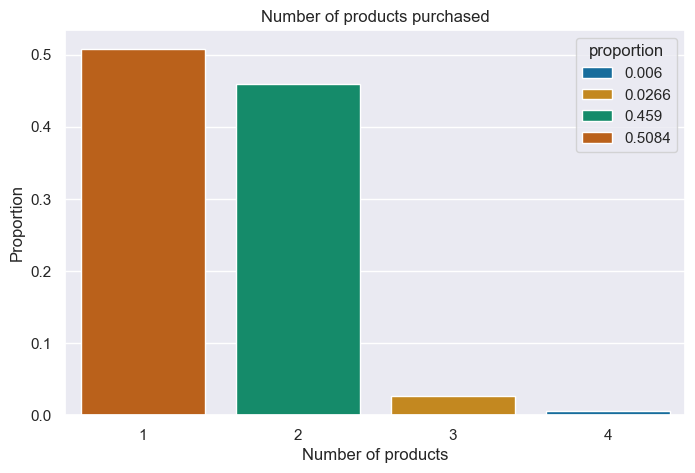

All customers have bought at least 1 product.  
Almost half have bought 2, and under 5 percent have bought more.


In [167]:
#Number of Products
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["NumOfProducts"].value_counts().index,
            y = df["NumOfProducts"].value_counts(normalize=True),
            hue = df["NumOfProducts"].value_counts(normalize=True),
            palette = sns.color_palette("colorblind", 4)
            )

ax.set(
    title = "Number of products purchased",
    xlabel = "Number of products",
    ylabel = "Proportion"
)

plt.show()
message = "All customers have bought at least 1 product.  \nAlmost half have bought 2, and under 5 percent have bought more."
print(message)

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_99262/1091867372.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(("No", "Yes"))


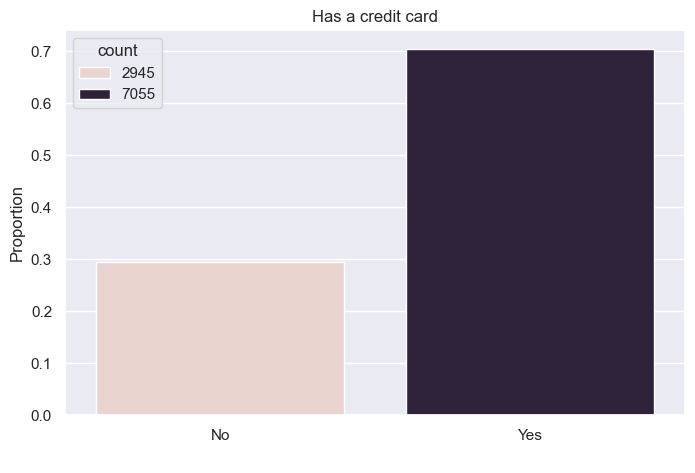

A big majority of bank clients do have a credit card.


In [168]:
# Has credit card
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["HasCrCard"].value_counts().index,
            y = df["HasCrCard"].value_counts(normalize=True),
            hue=df["HasCrCard"].value_counts(),
            )
ax.set_xticklabels(("No", "Yes"))
ax.set(
    title = "Has a credit card",
    xlabel = " ",
    ylabel = "Proportion"
)
plt.show()

message = "A big majority of bank clients do have a credit card."
print(message)

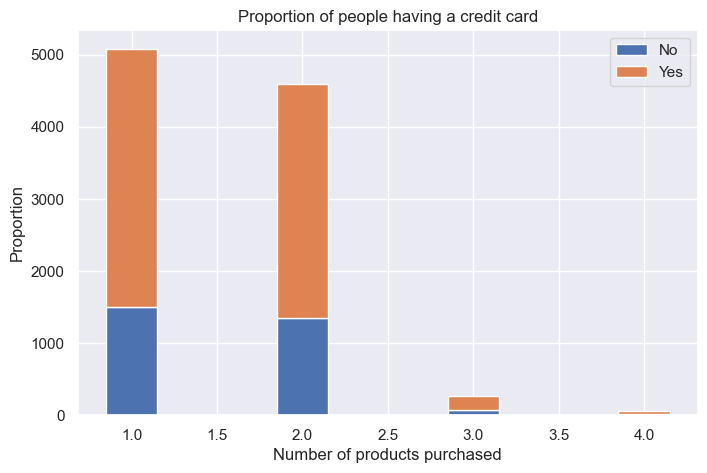

Not all people who have purchased two products have a credit card, so a credit card cannot be the second product.


In [169]:
# Is product 2 credit card and product 1 bank account?
df_prod_crcard = (df
      .groupby("NumOfProducts")["HasCrCard"]
      .value_counts()
      #.mul()
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_prod_crcard.index, df_prod_crcard[0], label = 'No', width = 0.3) 
ax.bar(df_prod_crcard.index, df_prod_crcard[1], bottom = df_prod_crcard[0], label='Yes', width = 0.3)

ax.set(
    title = "Proportion of people having a credit card",
    xlabel = "Number of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "Not all people who have purchased two products have a credit card, so a credit card cannot be the second product."
print(message)

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_99262/686505666.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Not recently active", "Recently active"])


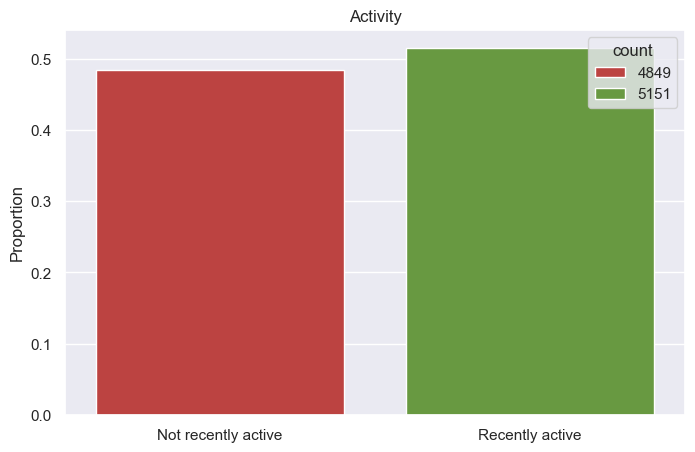

The proportions of active and non active members are almost (worriyngly?) equal.


In [170]:
# Is an active member
fig, ax = plt.subplots(figsize = (8,5))
colors = ["#d12f2c","#66a832"]
sns.barplot(
            x = df["IsActiveMember"].value_counts().index,
            y = df["IsActiveMember"].value_counts(normalize=True),
            hue=df["IsActiveMember"].value_counts(), 
            palette = sns.color_palette(colors)
            )
ax.set_xticklabels(["Not recently active", "Recently active"])

sns.set_theme(style="darkgrid")
ax.set(
    title = "Activity",
    xlabel = "",
    ylabel = "Proportion"
)
plt.show()

message = "The proportions of active and non active members are almost (worriyngly?) equal."
print(message)

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_99262/1240574389.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Stayed", "Exited"])


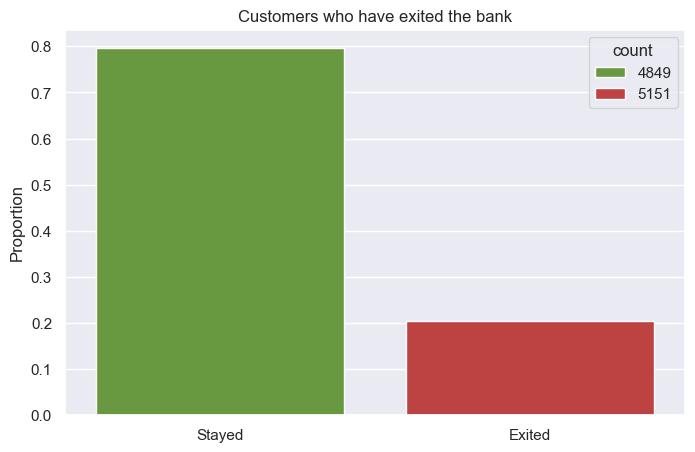

Around 20 percent of customers have exited the bank. The bank wishes to reduce this number.


In [171]:
# Exited
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["Exited"].value_counts().index,
            y = df["Exited"].value_counts(normalize=True),
            hue=df["IsActiveMember"].value_counts(), 
            palette = sns.color_palette(list(reversed(colors)))
            )

ax.set(
    title = "Customers who have exited the bank",
    xlabel = "",
    ylabel = "Proportion"
)
ax.set_xticklabels(["Stayed", "Exited"])

plt.show()
message="Around 20 percent of customers have exited the bank. The bank wishes to reduce this number."
print(message)

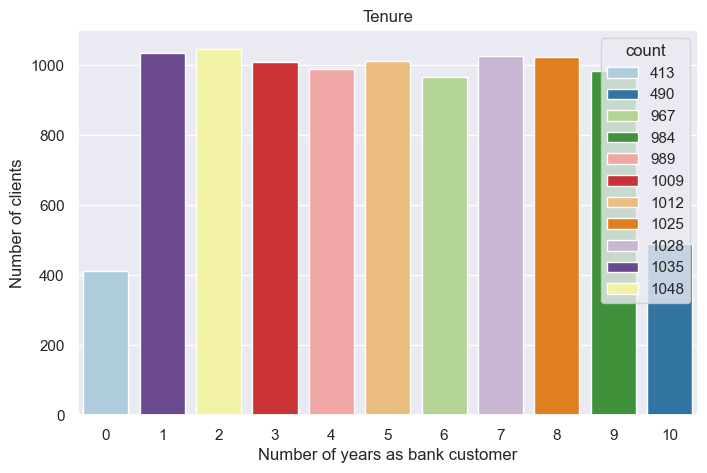

There is a uniform repartition of the amount of years the customers have been with this bank,
expect for those that have been with it for 10 years or are newcomers.
The bank is possibly 10 years old?


In [172]:
# Tenure
fig, ax = plt.subplots(figsize=[8, 5])

sns.barplot(
    x = df["Tenure"].value_counts().index, 
    y = df["Tenure"].value_counts(),
    hue = df["Tenure"].value_counts(),
    #hue_order = df["Tenure"].index,
    palette = sns.color_palette("Paired",11)
)
ax.set(
    title = "Tenure",
    xlabel = "Number of years as bank customer",
    ylabel = "Number of clients"
)

plt.show()

message = "There is a uniform repartition of the amount of years the customers have been with this bank,\nexpect for those that have been with it for 10 years or are newcomers.\nThe bank is possibly 10 years old?"
print(message)


# How do the different variables interact with each other? 
Can we observe any trends in the variable's structures?

### Correlations with Exited

In [173]:
df_geo_exit

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


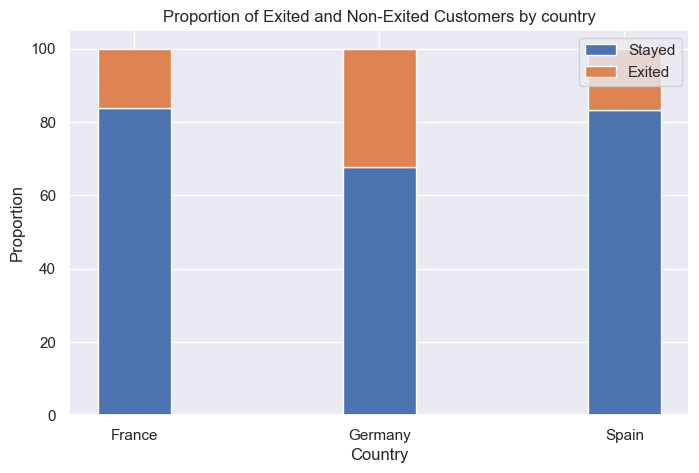

We can see that a higher proportion of people who leave are from Germany.


In [174]:
# Geography, Exited
df_geo_exit = (df
      .groupby("Geography")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_geo_exit.index, df_geo_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_geo_exit.index, df_geo_exit[1], bottom = df_geo_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers by country",
    xlabel = "Country",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "We can see that a higher proportion of people who leave are from Germany."
print(message)

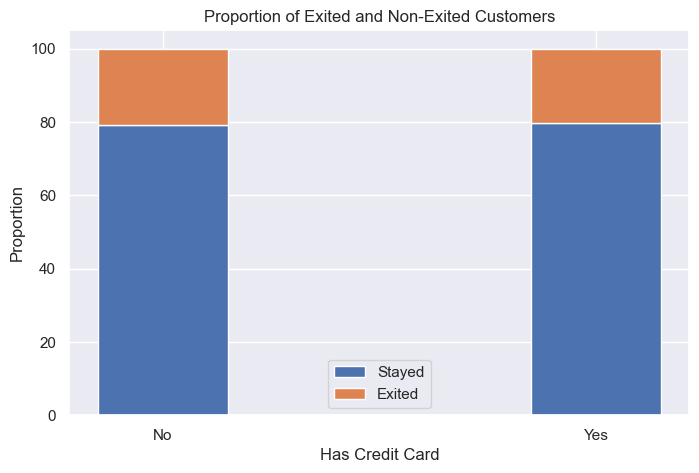

We can see that there is no sognificant difference in leave between people who have and who don't have credit cards.


In [175]:
# HasCreditCard, Exited
df_card_exit = (df
      .groupby("HasCrCard")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
#df_card_exit.index = ["False", "True"]


fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_card_exit.index, df_card_exit[0], label = 'Stayed', tick_label = ["No", "Yes"],  width = 0.3) 
ax.bar(df_card_exit.index, df_card_exit[1], bottom = df_card_exit[0], tick_label = ["No", "Yes"], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Has Credit Card",
    ylabel = "Proportion",
)
ax.legend()
plt.show()

message = "We can see that there is no sognificant difference in leave between people who have and who don't have credit cards."
print(message)


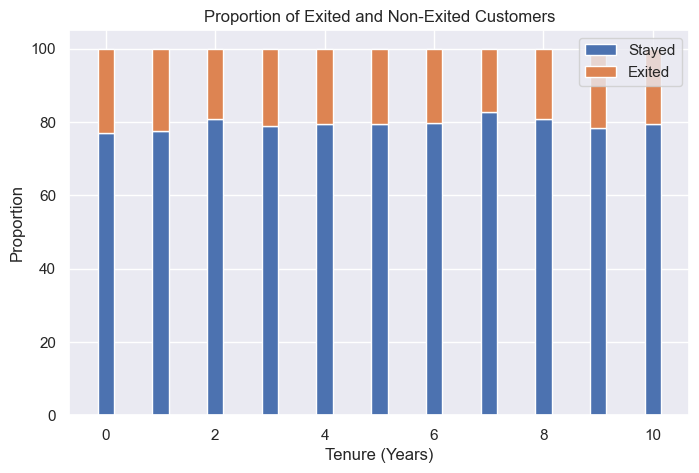

There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank.


In [176]:
# Tenure, Exited

df_tenure_exit = (df
      .groupby("Tenure")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_tenure_exit.index, df_tenure_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_tenure_exit.index, df_tenure_exit[1], bottom = df_tenure_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Tenure (Years)",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank."
print(message)

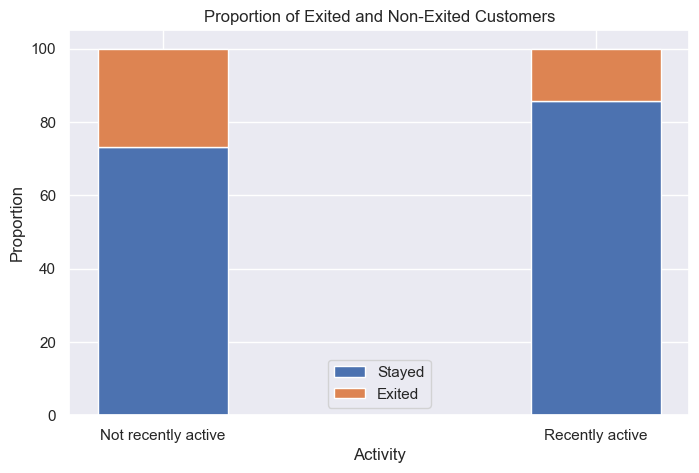

There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank.


In [177]:
# Is active member, Exited
df_active_exit = (df
      .groupby("IsActiveMember")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_active_exit.index, df_active_exit[0], label = 'Stayed', tick_label = ["Not recently active", "Recently active"], width = 0.3) 
ax.bar(df_active_exit.index, df_active_exit[1], bottom = df_active_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Activity",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank."
print(message)

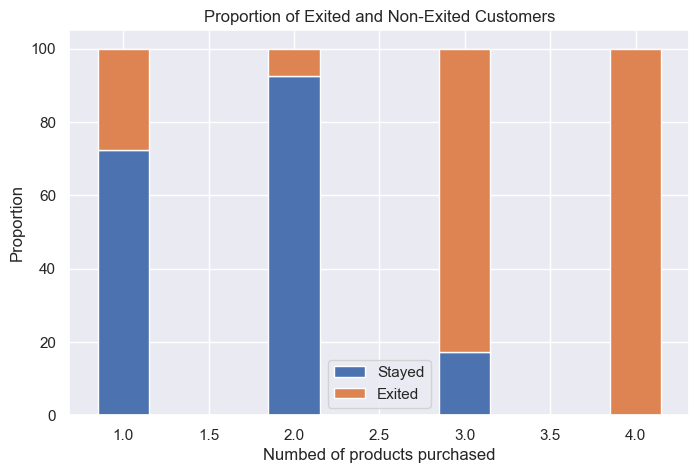

At first sight, there seems to be a link between exiting and purchasing a big number of products.
Particularly, all people who bought 4 products exited. 
However, we have to be careful when comparing because the sizes of people having purchased 3 and 4 products are too small: 
266 and 60 compared to 5084 and 4590 for 1 and 2 prodcts purchased respectively.


In [178]:
# Numbed of products, Exited
df_products_exit = (df
      .groupby("NumOfProducts")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_products_exit.index, df_products_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_products_exit.index, df_products_exit[1], bottom = df_products_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Numbed of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "At first sight, there seems to be a link between exiting and purchasing a big number of products.\nParticularly, all people who bought 4 products exited. \nHowever, we have to be careful when comparing because the sizes of people having purchased 3 and 4 products are too small: \n{} and {} compared to {} and {} for 1 and 2 prodcts purchased respectively.".format(
    len(df.query("NumOfProducts == 3")),
    len(df.query("NumOfProducts == 4")),
    len(df.query("NumOfProducts == 1")),
    len(df.query("NumOfProducts == 2"))
)
print(message)

### Gendered patterns in activity variables


For Sarah: No activity variable seems to be linked with gender so maybe we can put a small paragraph on latex explaining this and showing these 4 plots but small and in a grid so that we can move on quickly with this?

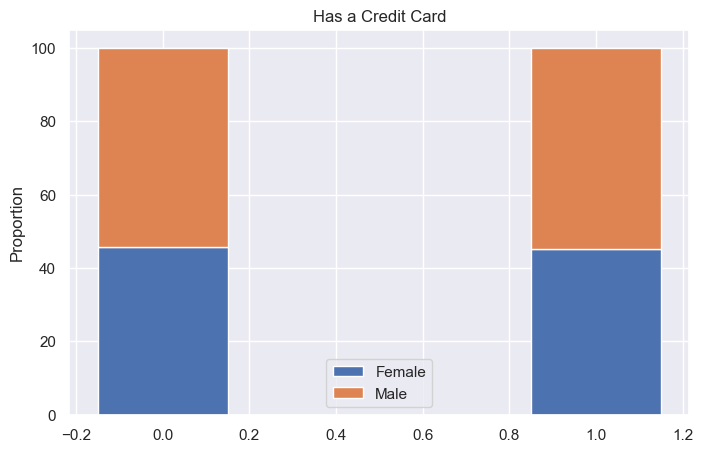

Gender differences don't explain having or not having a credit card.


In [179]:
# HasCreditCard, Gender
df_card_gender = (df
      .groupby("HasCrCard")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_card_gender.index, df_card_gender["Female"], label = 'Female',  width = 0.3) 
ax.bar(df_card_gender.index, df_card_gender["Male"], bottom = df_card_gender["Female"],  label='Male', width = 0.3)

ax.set(
    title = "Has a Credit Card",
    xlabel = "",
    ylabel = "Proportion",
)
ax.legend()
plt.show()

message = "Gender differences don't explain having or not having a credit card."
print(message)

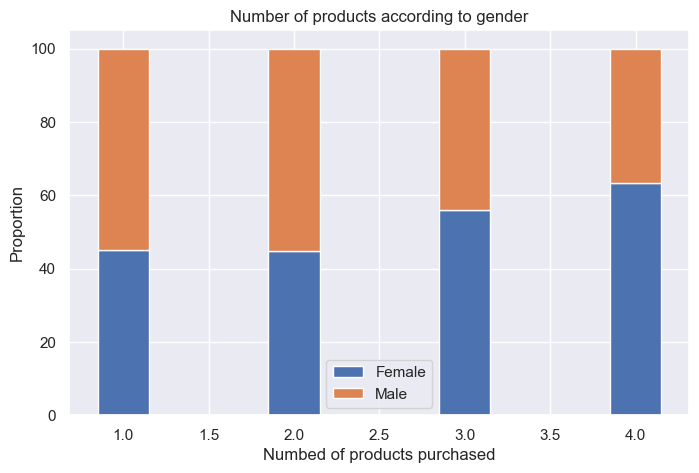

We can see women appear more likely than men to buy more than two products.
However, again, we have to be careful when comparing because there are very few people buying products 3 and 4.


In [180]:
# Numbed of products, Gender
df_prods_gender = (df
      .groupby("NumOfProducts")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_prods_gender.index, df_prods_gender["Female"], label = 'Female', width = 0.3) 
ax.bar(df_prods_gender.index, df_prods_gender["Male"], bottom = df_prods_gender["Female"], label='Male', width = 0.3)

ax.set(
    title = "Number of products according to gender",
    xlabel = "Numbed of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()
message = "We can see women appear more likely than men to buy more than two products.\nHowever, again, we have to be careful when comparing because there are very few people buying products 3 and 4."
print(message)

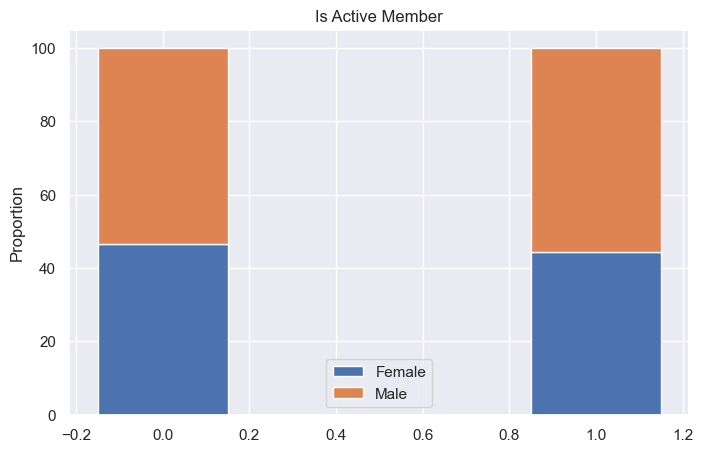

There are no significant gender differences in activity.


In [181]:
# Is active, Gender
df_active_gender = (df
      .groupby("IsActiveMember")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_active_gender.index, df_active_gender["Female"], label = 'Female',  width = 0.3) 
ax.bar(df_active_gender.index, df_active_gender["Male"], bottom = df_active_gender["Female"],  label='Male', width = 0.3)

ax.set(
    title = "Is Active Member",
    xlabel = "",
    ylabel = "Proportion",
)
ax.legend()
plt.show()

message = "There are no significant gender differences in activity."
print(message)

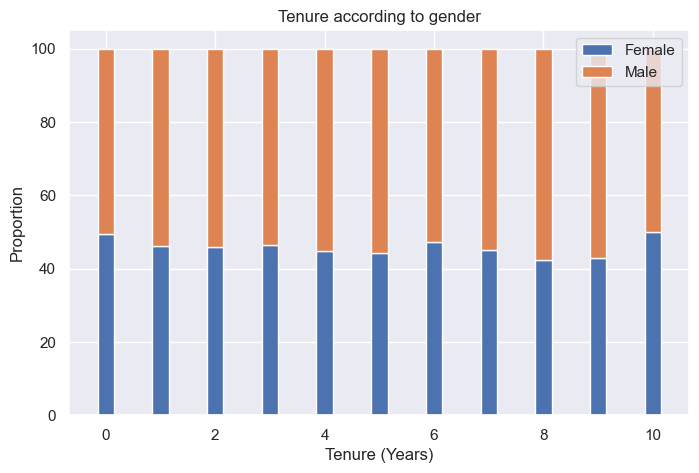

There doesn't seem to be any relation between tenure and gender.


In [182]:
# Tenure, Exited
df_tenure_gender = (df
      .groupby("Tenure")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_tenure_gender.index, df_tenure_gender["Female"], label ="Female", width = 0.3) 
ax.bar(df_tenure_gender.index, df_tenure_gender["Male"], bottom = df_tenure_gender["Female"], label="Male", width = 0.3)

ax.set(
    title = "Tenure according to gender",
    xlabel = "Tenure (Years)",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any relation between tenure and gender."
print(message)

### Gender patterns in financial variables

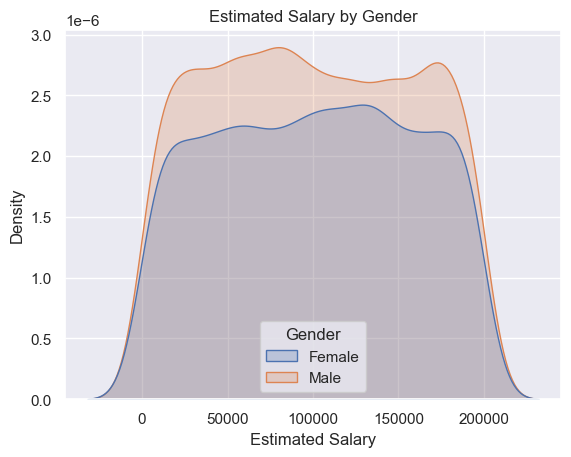

We can see that on average, the estimated salary is lower for women.
We also observe differences in the distribution, as the number of men being at around 175k is higher than those being around 130k, 
whereas for women its the conrtrary. 
There is less women at the rich end of the distribution with respects to men.
We now want to observe whether this difference affect other financial variables such as balance or credit score.


In [183]:
# Estimated Salary, Gender
sns.kdeplot(data=df, x="EstimatedSalary", hue="Gender", fill=True) 
plt.title('Estimated Salary by Gender') 
plt.xlabel('Estimated Salary') 
plt.ylabel('Density') 
plt.show() 

message = "We can see that on average, the estimated salary is lower for women.\nWe also observe differences in the distribution, as the number of men being at around 175k is higher than those being around 130k, \nwhereas for women its the conrtrary. \nThere is less women at the rich end of the distribution with respects to men.\nWe now want to observe whether this difference affect other financial variables such as balance or credit score."
print(message)

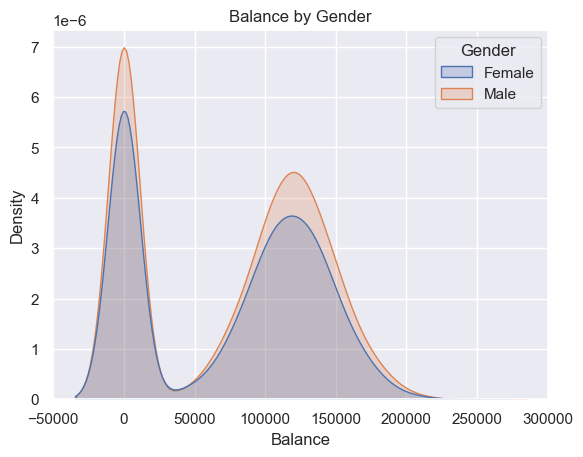

We do not actually observe gender differences in balance distribution. 
Estimated salary this probably does not affect balance distribution among bank customers.


In [184]:
# Balance, Gender
sns.kdeplot(data=df, x="Balance", hue="Gender", fill=True) 
plt.title('Balance by Gender') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message = "We do not actually observe gender differences in balance distribution. \nEstimated salary this probably does not affect balance distribution among bank customers."
print(message)

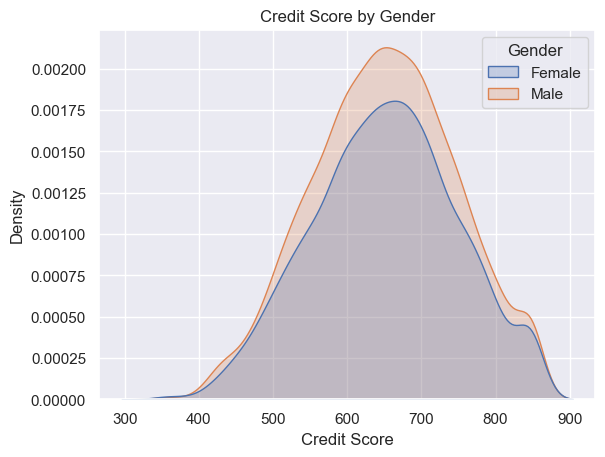


.


In [185]:
# CreditScore, Gender
sns.kdeplot(data=df, x="CreditScore", hue="Gender", fill=True) 
plt.title('Credit Score by Gender') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

message = "\n."
print(message)

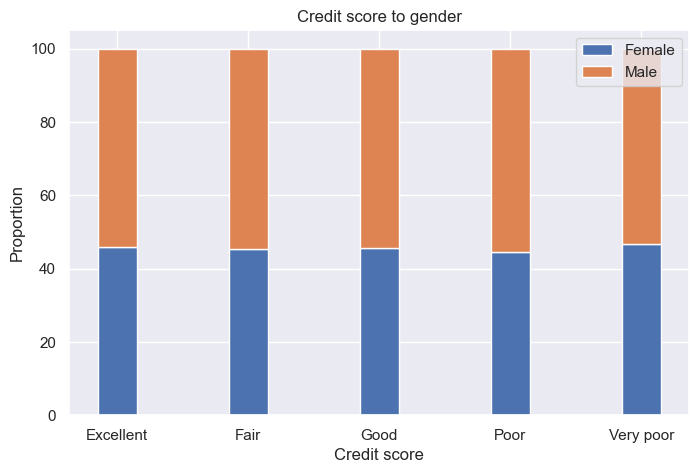

We also do not see any impact of gender differences in salary in the credit score of each gender.


In [186]:
# credit score, Gender
df_crScore_gender = (df
      .groupby("CreditScoreCategory")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_crScore_gender.index, df_crScore_gender["Female"], label = 'Female', width = 0.3) 
ax.bar(df_crScore_gender.index, df_crScore_gender["Male"], bottom = df_crScore_gender["Female"], label='Male', width = 0.3)

ax.set(
    title = "Credit score to gender",
    xlabel = "Credit score",
    ylabel = "Proportion"
)
ax.legend()
plt.show()
message = "We also do not see any impact of gender differences in salary in the credit score of each gender."
print(message)

In [187]:
#sns.scatterplot(data=df, x=df["CreditScore"], y=df["Balance"])
#sns.scatterplot(data=df, x=df["EstimatedSalary"], y=df["Balance"])

#Idk if this is the best way to do this, or if its interesting to do, but these variables aren't correlated. 

### Identifying possible activity patterns with financial data

Result: Balance could be an interesting predictor of number of products purchased. People with low balance seem to buy two products more than people with a higher balance. Maybe these products offer clients financial help?

Can estimated salary tell us something?
(spoiler: no.)

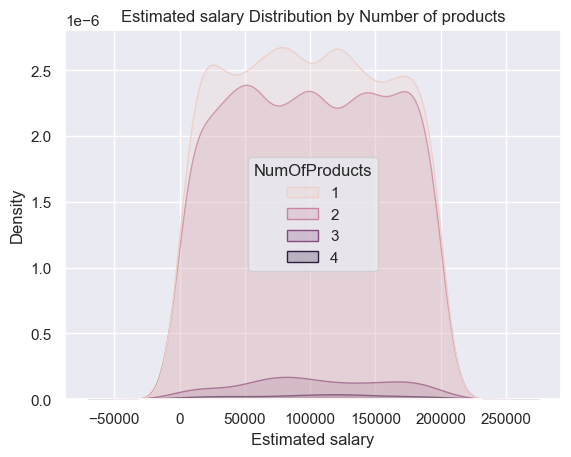

No trend sticks out.  
Again, we could question whether it is even interesting to look at number of products due to the small samples for products 3 and 4.


In [188]:
# Estimated salary and Number of products
sns.kdeplot(data=df, x="EstimatedSalary", hue="NumOfProducts", fill=True) 
plt.title('Estimated salary Distribution by Number of products') 
plt.xlabel('Estimated salary') 
plt.ylabel('Density') 
plt.show() 

message = "No trend sticks out.  \nAgain, we could question whether it is even interesting to look at number of products due to the small samples for products 3 and 4."
print(message)

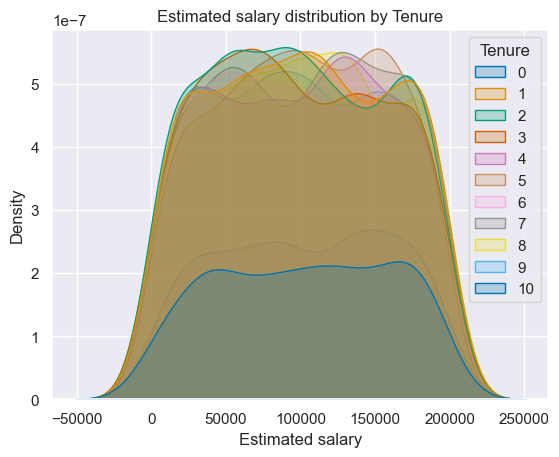

No trends stick out.


In [189]:
# Estimated salary and Tenure

sns.kdeplot(data=df, x="EstimatedSalary", hue="Tenure", 
            palette=sns.color_palette("colorblind", 11), fill=True) 
plt.title('Estimated salary distribution by Tenure') 
plt.xlabel('Estimated salary') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out."
print(message)

# Is this the best way to plot this?
# I think we can discard this one: there is no point and indeed no results

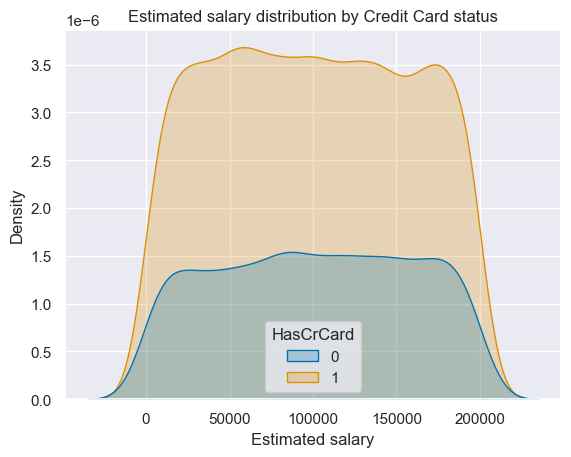

No trends stick out.


In [190]:
# Estimated salary and Credit card
# I dont know how to change label!

sns.kdeplot(data=df, x="EstimatedSalary", hue="HasCrCard", label=["Has a credit card"],
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Estimated salary distribution by Credit Card status') 
plt.xlabel('Estimated salary') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out."
print(message)

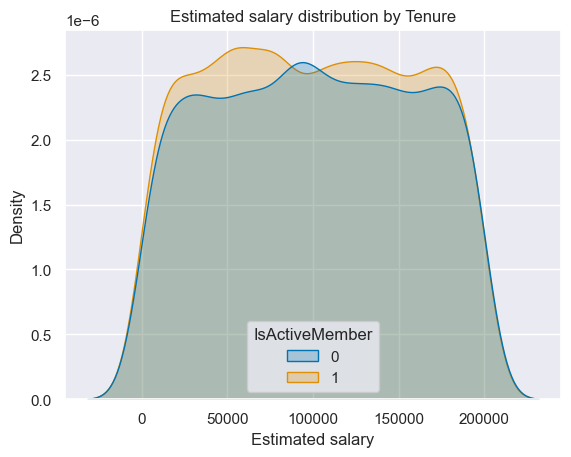

No trends stick out. 
We would have imagined a relationship with estimated salary but it doesnt seem to be a predictor of individual activity


In [191]:
# Estimated salary and Activity

sns.kdeplot(data=df, x="EstimatedSalary", hue="IsActiveMember", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Estimated salary distribution by Tenure') 
plt.xlabel('Estimated salary') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out. \nWe would have imagined a relationship with estimated salary but it doesnt seem to be a predictor of individual activity"
print(message)

Can balance tell us something?

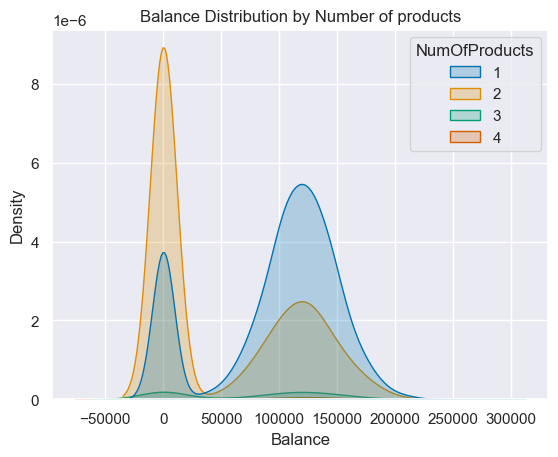

We wil focus only on products 1 and 2. 
We see that people with a balance close to zero actually seem much more prone to buy two products 
than people with a higher balance, who in their majority only but¡y 1 product.


In [192]:
# Balance and Number of products
sns.kdeplot(data=df, x="Balance", hue="NumOfProducts",
            palette=sns.color_palette("colorblind", 4), fill=True) 
plt.title('Balance Distribution by Number of products') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message = "We wil focus only on products 1 and 2. \nWe see that people with a balance close to zero actually seem much more prone to buy two products \nthan people with a higher balance, who in their majority only but¡y 1 product."
print(message)

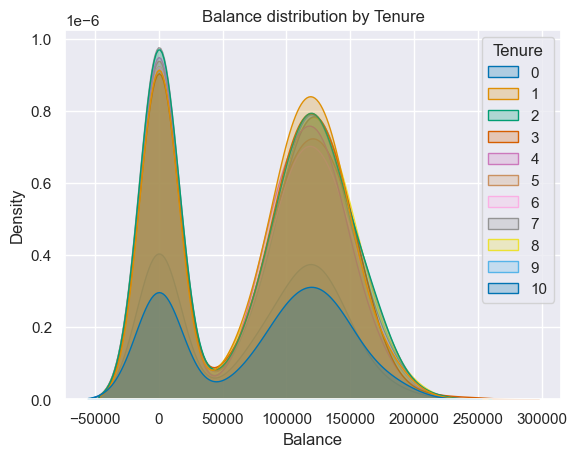

No distributional trends stick out.


In [193]:
# Balance and Tenure

sns.kdeplot(data=df, x="Balance", hue="Tenure", 
            palette=sns.color_palette("colorblind", 11), fill=True) 
plt.title('Balance distribution by Tenure') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message = "No distributional trends stick out."
print(message)

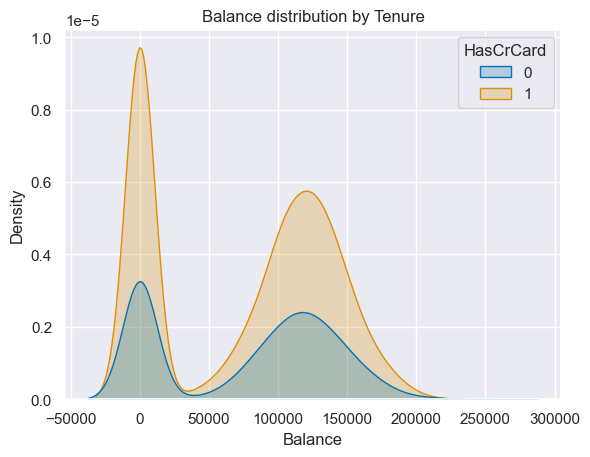

No distributional trends stick out.


In [194]:
# Balance and Credit card

sns.kdeplot(data=df, x="Balance", hue="HasCrCard", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Balance distribution by Tenure') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message = "No distributional trends stick out."
print(message)

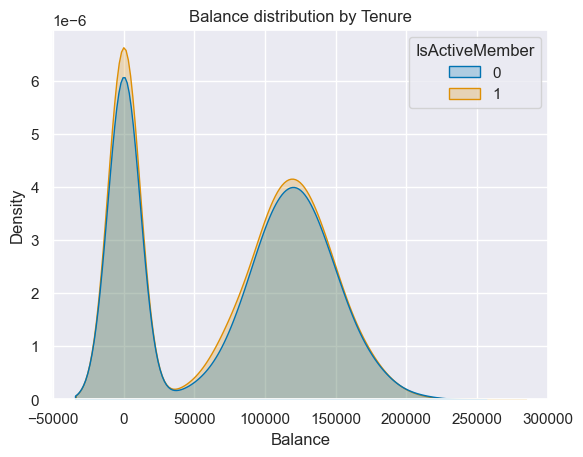

No trends stick out.


In [195]:
# Balance and Activity

sns.kdeplot(data=df, x="Balance", hue="IsActiveMember", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Balance distribution by Tenure') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out."
print(message)

Can credit score tell us something?

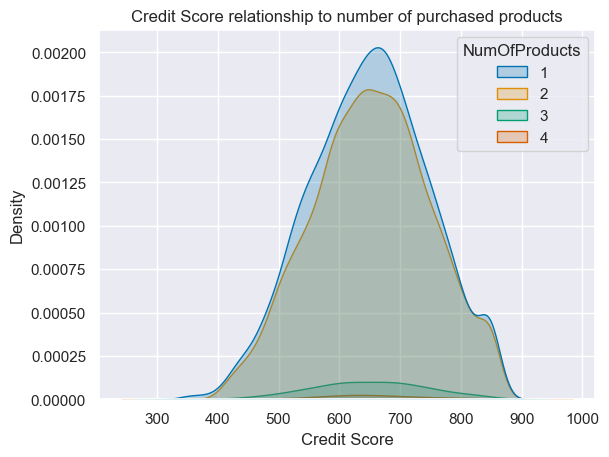

We dot see any trends.


In [196]:
# credit score and Number of products
sns.kdeplot(data=df, x="CreditScore", hue="NumOfProducts",
            palette=sns.color_palette("colorblind", 4), fill=True) 
plt.title('Credit Score relationship to number of purchased products') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

message = "We dot see any trends."
print(message)

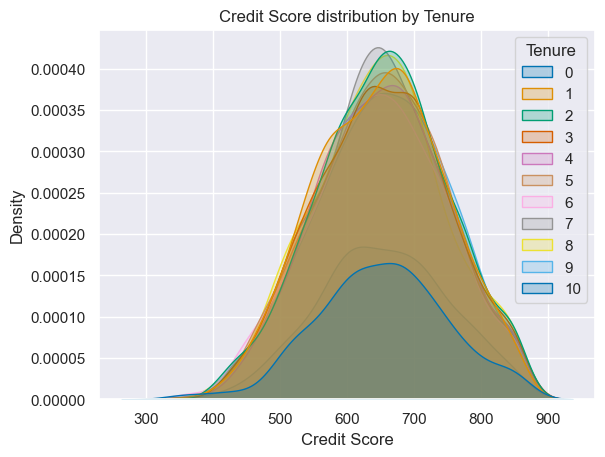

No distributional trends stick out.


In [197]:
# Credit Score and Tenure

sns.kdeplot(data=df, x="CreditScore", hue="Tenure", 
            palette=sns.color_palette("colorblind", 11), fill=True) 
plt.title('Credit Score distribution by Tenure') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

message = "No distributional trends stick out."
print(message)

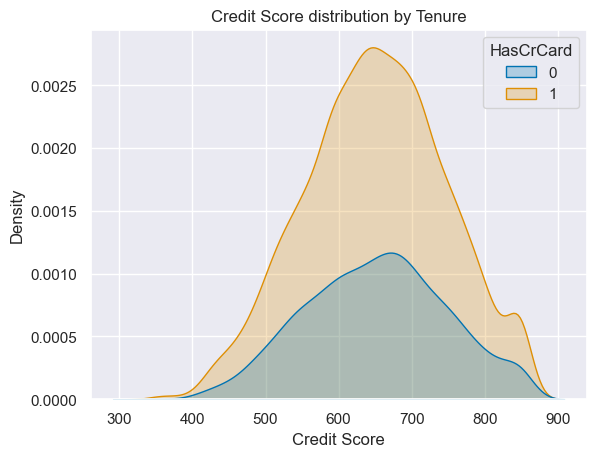

No distributional trends stick out.


In [198]:
# Credit Score and Credit card

sns.kdeplot(data=df, x="CreditScore", hue="HasCrCard", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Credit Score distribution by Tenure') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

message = "No distributional trends stick out."
print(message)

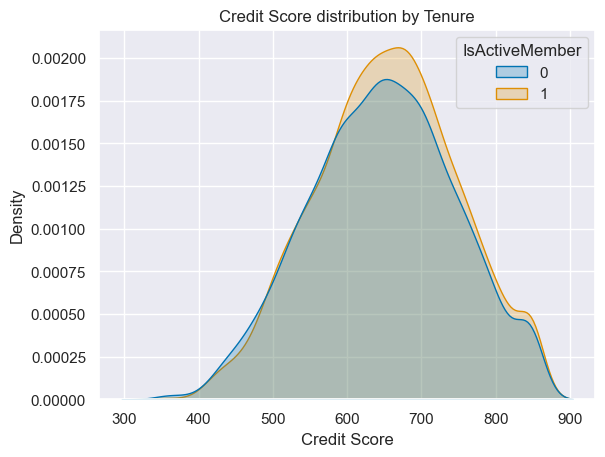

No trends stick out.


In [199]:
# Credit Score and Activity

sns.kdeplot(data=df, x="CreditScore", hue="IsActiveMember", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Credit Score distribution by Tenure') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out."
print(message)

### Geographic trends: How is Germany an exception?

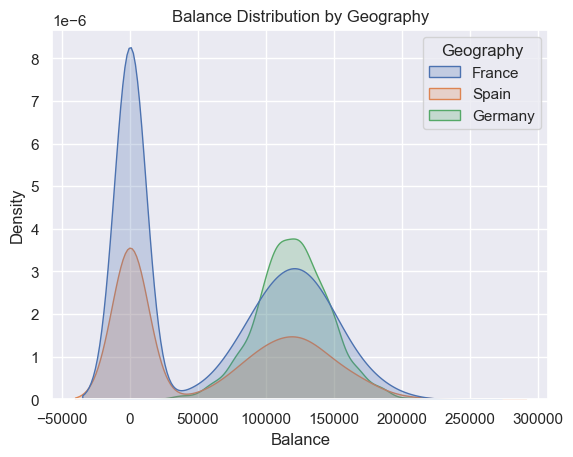

Germany doesn't seem to have low balances!


In [200]:
# Quick look how does Balance interact with Geography - and therefore after how is it interacting with churn ?

sns.kdeplot(data=df, x="Balance", hue="Geography", fill=True) 
plt.title('Balance Distribution by Geography') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message ="Germany doesn't seem to have low balances!"
print(message)

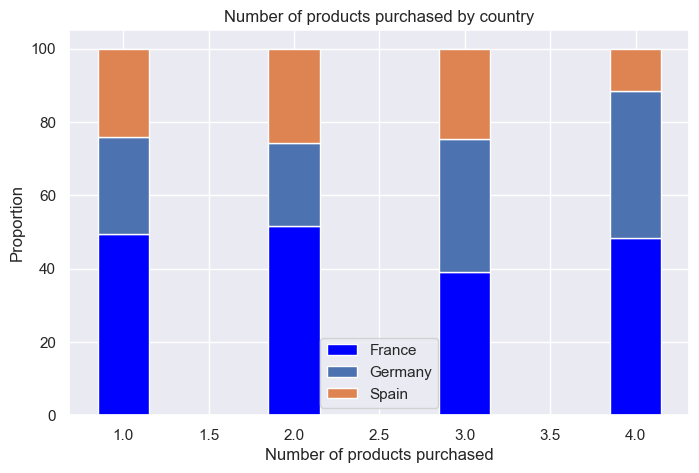

 No trends.


In [201]:
# Number of products, Geography
df_products_geography = (df
      .groupby("NumOfProducts")["Geography"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_products_geography.index, df_products_geography["France"], label = 'France', width = 0.3, color = "blue") 
ax.bar(df_products_geography.index, df_products_geography["Germany"], bottom = df_products_geography["France"], label='Germany', width = 0.3)
ax.bar(df_products_geography.index, df_products_geography["Spain"], bottom = (df_products_geography["Germany"]+df_products_geography["France"]), label='Spain', width = 0.3)

ax.set(
    title = "Number of products purchased by country",
    xlabel = "Number of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message =" No trends."
print(message)


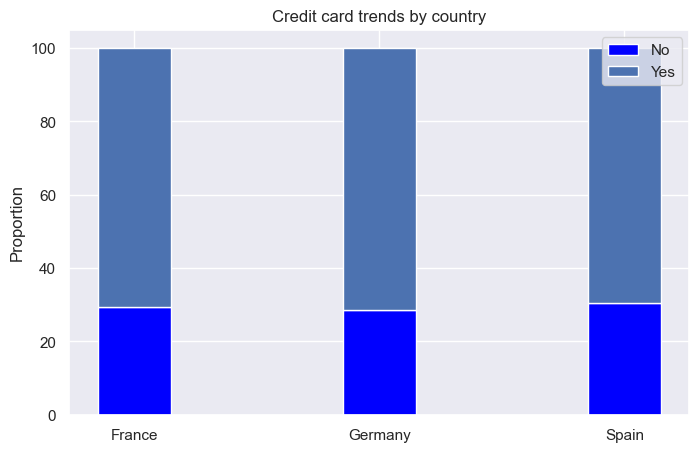

No trends. 
 
It would be interesting to know whether a credit card is in the american sense of the term or in the european term, i.e, a debit card for americans.


In [202]:
# Geography, Has Credit Card
df_geography_crcard = (df
      .groupby("Geography")["HasCrCard"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_geography_crcard.index, df_geography_crcard[0], label = 'No', width = 0.3, color = "blue") 
ax.bar(df_geography_crcard.index, df_geography_crcard[1], bottom = df_geography_crcard[0], label='Yes', width = 0.3)
ax.set(
    title = "Credit card trends by country",
    xlabel = "",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message ="No trends. \n \nIt would be interesting to know whether a credit card is in the american sense of the term or in the european term, i.e, a debit card for americans."
# Add what you know about germany having credit cards!
print(message)

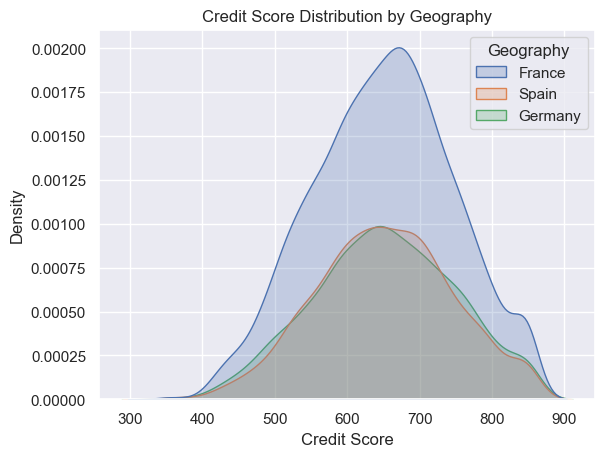

No trends.


In [203]:
# Credit score and geography

sns.kdeplot(data=df, x="CreditScore", hue="Geography", fill=True) 
plt.title('Credit Score Distribution by Geography') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

message ="No trends."
print(message)